# CMSE 802 Pre-class assignment: Agent-Based Modeling and Object Oriented Programming 
## Date: 10/9/2018
## Due: 10/10/2018; 10:30 PM

### The goal of this assignment is to learn and get familiar with agent-based modeling of ant foraging.

---
### Your name: Boyao Zhu

---
### Part 1: Study the code for ant-foraging model given below. Understand what each part of the code is doing. This practice will help you in developing your own ant-foraging model.  Write markdown comments after "<i># ==></i>" in the code. The markdown comments should be concise but with enough information for readers.  

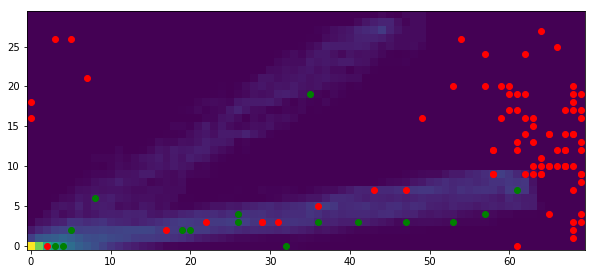

499


<Figure size 720x360 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import random 
import numpy as np

from IPython.display import display, clear_output
import time


# ==> initialize the amount of ants and dimension of space
num_ants = 100
x_dim = 70
y_dim = 30

# ==> create pheromones and food space (initialization)
smell = np.zeros((x_dim,y_dim))
food = np.zeros((x_dim,y_dim))

# ==> create where the food is in the space
food[45:50, 25:30] = 10
food[60:65, 5:10] = 10

# ==> initialized the position of ants
ant_loc = np.zeros((num_ants,2))
for a in range(num_ants):
    ant_loc[a,0] = np.random.randint(0,x_dim)
    ant_loc[a,1] = np.random.randint(0,y_dim)
    
# ==> inialized whether ants have food with it (0 initially)
has_food = np.zeros(num_ants)

directions = ['up', 'left', 'down', 'right']


fig, ax = plt.subplots(figsize=(10,5))

# Main simulation loop
for i in range(500):
    
    # Loop over ants
    for a in range(0,num_ants):
        
        # ==> get the position of an ant
        x = int(ant_loc[a,0])
        y = int(ant_loc[a,1]) 
    
        # If ant is at home, put food down. The ant has no food carried on it. 
        if (x == 0 and y == 0):
            has_food[a] = 0  
            
        # ==> for an ant with food
        if (has_food[a] == 1):
            
            # ==> the way going back to home
            pick = np.zeros(x + y)
            pick[0:x] = 1          
            if ( np.random.choice(pick) == 1 ):
                x = x - 1
            else:
                y = y - 1

            # Prevent ants from going out of bound.
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
                
            # ==> when an ant has food, it sends out the pheromones
            smell[x, y] = smell[x, y] + 100    
            
        else:

            # Check to see if there is pheromone around.
            g = [] 
            m  = [] 
            
            # ==> check if right direction has smell
            if ( x + 1 < x_dim ):
                if ( smell[x+1, y] > 0 ):
                    m.append(smell[x+1, y])
                    g.append('right')
                    
            # ==> check if up direction has smell 
            if ( y + 1 < y_dim ):
                if ( smell[x, y+1] > 0 ):
                    m.append(smell[x, y+1])
                    g.append('up')
                    
                             
            # ==> search direction       
            if ( g != [] ):
                grad = g[m.index(max(m))]
            else:
                grad = random.choice(directions)
                
            # Move the ant in one of the four directions.
            if ( grad == 'up' ):
                y = y + 1
            elif ( grad == 'right' ):
                x = x + 1
            elif ( grad == 'down' ):
                y = y - 1
            elif ( grad == 'left' ):
                x = x - 1
            else:
                print(grad)
                print("ERROR!!!!!!!!!!!!")

                
            # ==> set boundary
            if ( x < 0 ):
                x = 0
            if ( y < 0 ):
                y = 0
            if ( x > x_dim - 1 ):
                x = x_dim - 1
            if ( y > y_dim - 1 ):
                y = y_dim - 1
    
            # If an ant is on the grid with food, the ant picks food and food level is 
            # subtracted by 1.
            if food[x, y] > 0:
                has_food[a] = 1
                food[x,y] = food[x,y] - 1
                                
        
        # update ant location
        ant_loc[a,0] = x
        ant_loc[a,1] = y
    
    # ==> smell keeps deceasing
    smell = smell - 1
    smell[smell < 0] = 0
    

    # plot the universe
    plt.imshow(50*food.T+smell.T, origin='lower', aspect='equal')
    
    for a in range(0,num_ants):
        color = 'r'
        if (has_food[a] == 1):
            color = 'g'
        plt.scatter(ant_loc[a,0], ant_loc[a,1], color=color)

    # Animaiton part (dosn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
    
    print(i)
   

### Answer the following questions:
1. Where is the ant home?
1. What is the pheromones level on the ground right after ants crawl over?
1. What is the evaporation rate of pheromone?

**Your answer: **    1. origin
2. 100
3. -1

---
### Part 2: In your in-class assignment on 10/09 (Object-Oriented Programming), you have sketched your version of ant-foraging model. Compare to the one provide here, other than linear versus object-oriented progamming, (1) what are the differences in your model from mine?  List the differences and describe the improvement between yours and mine in the cell below. (2) What will you want to improve from your previous version of ant-foraging model?

**Your answer: ** 1. I use class to create object, but you didn't
2. No idea right now

### I encourage you to think about how you will implement your ant model. Let's meet in the class and make it work.

---
### Congratulations, you're done with your first pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181010, and upload it there.


See you in class!